# Malicious URLs dataset Data Science Project

### Used the Malicous URL Dataset from Kaggle.com

- https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset

### Project Overview

- Performed Feature Engineering on Dataset, consisting of one url column and the classification
- Conduct Exploratory Data Analysis
- Fit and Train a model with the overall goal of being able to take in a url and identify whether its likely malware, phishing, benign or defacement with over 90% accuracy

## Data Preprocessing and Feature Engineering

In [66]:
import pandas as pd
import numpy as np
import re

In [67]:
df =pd.read_csv("malicious_phish.csv")

The Dataset has two columns one for the url and type, In order to make this dataset use for a classification , additional features will need to be added, the following lines of code are feature engineering

In [68]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [69]:
## Create column for len of url

df["url_len"] = df["url"].apply(lambda x: len(x))

In [70]:
## Create new column separating data buy parts

df["url_parts"] = df["url"].apply(lambda x: len(x.split(".")))

In [71]:
## Create new column, gathering suffix len
df["suffix_len"] = df["url"].apply(lambda x: len(x.split(".")[-1]))

In [72]:
## Add column for query length
def query_domain_length(query):
    try:
        length =  len(query.split('.')[-2])
    except:
        length = 0
    return length

df["domain_len"] = df["url"].apply(query_domain_length)

In [73]:
#Using a regular expression to identify if there is any IPv4 or IPv6 address within the dataset, if so return a 1, if not 
# return a 0 and create a column

def is_ip_address_present(s):
    ipv4_pattern = r"\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b"
    ipv6_pattern = r"\b([0-9a-fA-F]{1,4}:){7}[0-9a-fA-F]{1,4}\b"
    ipv4_match = re.search(ipv4_pattern, s)
    ipv6_match = re.search(ipv6_pattern, s)
    if ipv4_match or ipv6_match:
        return 1
    else:
        return 0
    

df["ip_present"] = df["url"].apply(is_ip_address_present)


In [74]:
## Create a new column and identify if the file ends in the following extensions

def has_malicious_file_extension(s):
    pattern = r"(\.exe|\.dll|\.bat|\.cmd|\.msi|\.vbs|\.ps1|\.psm1|\.js|\.jse|\.wsh|\.wsf|\.hta|\.scr|\.pif|\.cpl|\.ade|\.adp|\.bas|\.chm|\.cmd|\.com|\.crt|\.csh|\.hlp|\.inf|\.ins|\.isp|\.job|\.js|\.jse|\.lnk|\.mda|\.mdb|\.mde|\.mdt|\.mdw|\.mdz|\.msc|\.msi|\.msp|\.mst|\.nws|\.pcd|\.prf|\.reg|\.scf|\.shb|\.shs|\.tmp|\.url|\.vb|\.vbe|\.vbs|\.wsc|\.wsf|\.wsh)$"
    match = re.search(pattern, s, re.IGNORECASE)
    return 1 if bool(match) else 0

df["file_extension"] = df["url"].apply(has_malicious_file_extension)

In [75]:
## Identify if any shortened URL are present in the dataset

def has_shortened_link(url):
    shortening_services = ["bit.ly", "t.co", "tinyurl.com", "ow.ly", "goo.gl", "is.gd", "buff.ly", "adcrun.ch", "qr.net", "adf.ly", "bc.vc", "ow.ly", "po.st", "tr.im", "v.gd", "x.co", "tiny.cc", "tinyurl.co.uk", "tinyurl.de", "tinyurl.fr", "tinyurl.pl", "tinylink.in", "tinyuri.ca", "tinyurl.dk", "url.ie", "zi.pe"]
    for service in shortening_services:
        pattern = fr"\b{service}\b"
        if re.search(pattern, url, re.IGNORECASE):
            return 1
    return 0

df["shorted_link"] = df["url"].apply(has_shortened_link)

In [76]:
df["shorted_link"].value_counts()

0    650623
1       568
Name: shorted_link, dtype: int64

In [77]:
##Create a column for the count of each one of the special characters present within the url

special_char = ["%","=","/", "?",":","+","@","&","#","<",">","^"]

for special in special_char:
    df[f'{special}_count'] = df["url"].apply(lambda x: x.count(special))

In [78]:
##Quick test of the value counts to see new columns and breakdown
for special in special_char:
    df[f'{special}_count'].value_counts()[:5]

In [79]:
#quick look at the updated dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   url             651191 non-null  object
 1   type            651191 non-null  object
 2   url_len         651191 non-null  int64 
 3   url_parts       651191 non-null  int64 
 4   suffix_len      651191 non-null  int64 
 5   domain_len      651191 non-null  int64 
 6   ip_present      651191 non-null  int64 
 7   file_extension  651191 non-null  int64 
 8   shorted_link    651191 non-null  int64 
 9   %_count         651191 non-null  int64 
 10  =_count         651191 non-null  int64 
 11  /_count         651191 non-null  int64 
 12  ?_count         651191 non-null  int64 
 13  :_count         651191 non-null  int64 
 14  +_count         651191 non-null  int64 
 15  @_count         651191 non-null  int64 
 16  &_count         651191 non-null  int64 
 17  #_count         651191 non-nu

In [80]:
#new head of dataframe
df.head()

,url,type,url_len,url_parts,suffix_len,domain_len,ip_present,file_extension,shorted_link,%_count,...,/_count,?_count,:_count,+_count,@_count,&_count,#_count,<_count,>_count,^_count
0,br-icloud.com.br,phishing,16,3,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,3,4,22,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,3,3,16,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,4,53,8,0,0,0,0,...,3,1,1,0,0,3,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,3,198,9,0,0,0,0,...,3,1,1,0,0,2,0,0,0,0


## Exploratory Data Analysis (EDA)

- Using Pandas and Seaborn, performed EDA on the newly Engineered Dataset

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
url_len,651191.0,60.156831,44.753902,1.0,32.0,47.0,77.0,2175.0
url_parts,651191.0,3.195453,1.490732,1.0,2.0,3.0,4.0,43.0
suffix_len,651191.0,28.727095,36.893846,0.0,4.0,16.0,41.0,1589.0
domain_len,651191.0,17.293960,18.012462,0.0,8.0,11.0,20.0,1007.0
ip_present,651191.0,0.018993,0.136500,0.0,0.0,0.0,0.0,1.0
file_extension,651191.0,0.029355,0.168801,0.0,0.0,0.0,0.0,1.0
shorted_link,651191.0,0.000872,0.029521,0.0,0.0,0.0,0.0,1.0
%_count,651191.0,0.519502,4.462254,0.0,0.0,0.0,0.0,231.0
=_count,651191.0,0.603863,1.516960,0.0,0.0,0.0,0.0,51.0
/_count,651191.0,2.950265,1.904187,0.0,2.0,3.0,4.0,41.0


In [83]:
## Noticed the malware url's have significantly more IP's and % signs present than the rest of the other types
df.groupby("type").mean()

,url_len,url_parts,suffix_len,domain_len,ip_present,file_extension,shorted_link,%_count,=_count,/_count,?_count,:_count,+_count,@_count,&_count,#_count,<_count,>_count,^_count
type,,,,,,,,,,,,,,,,,,,
benign,57.675429,2.938421,28.500625,17.848838,0.000399,0.002200,0.001021,0.538022,0.322663,2.735360,0.180781,0.094276,0.099689,0.001577,0.147654,0.000348,0.000021,0.000033,0.000082
defacement,86.339395,3.844926,44.987673,17.187337,0.000000,0.000156,0.000010,0.041241,2.324860,3.826078,0.570099,1.239329,0.007319,0.000021,1.730180,0.000010,0.000021,0.000021,0.000000
malware,56.542958,3.814053,20.736439,17.425523,0.362485,0.201415,0.000000,3.028321,0.411900,4.016328,0.127737,1.118788,0.022694,0.001292,0.285086,0.000031,0.000000,0.000031,0.000000
phishing,45.858051,3.485246,15.852536,14.833686,0.004346,0.123354,0.001381,0.058516,0.185451,2.661825,0.097629,0.284281,0.004686,0.007714,0.089320,0.004420,0.000425,0.000340,0.000521


<AxesSubplot:xlabel='type'>

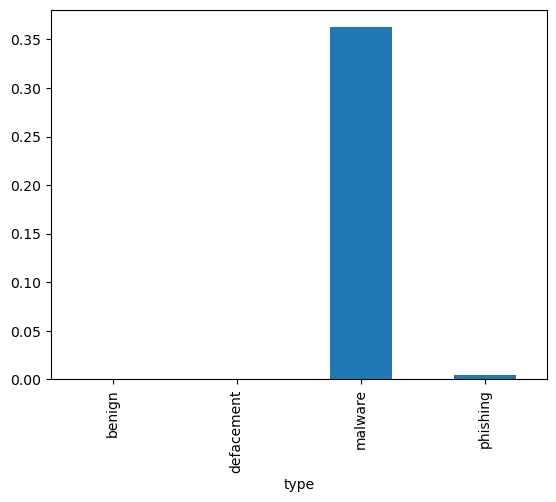

In [42]:
## Plot of the finding
df.groupby("type")["ip_present"].mean().plot(kind="bar")

Dataset is high imbalanced

<AxesSubplot:xlabel='type', ylabel='count'>

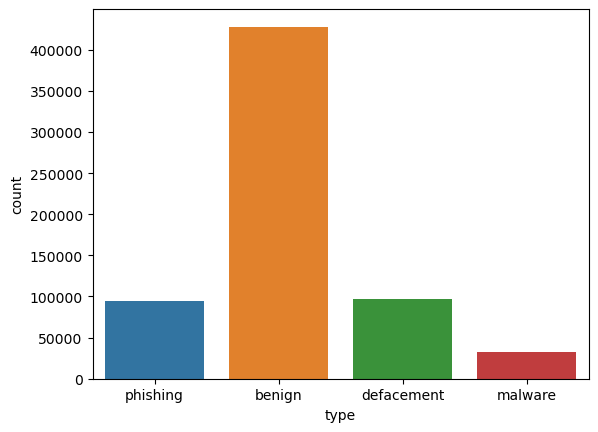

In [49]:
sns.countplot(data=df, x="type")

<AxesSubplot:>

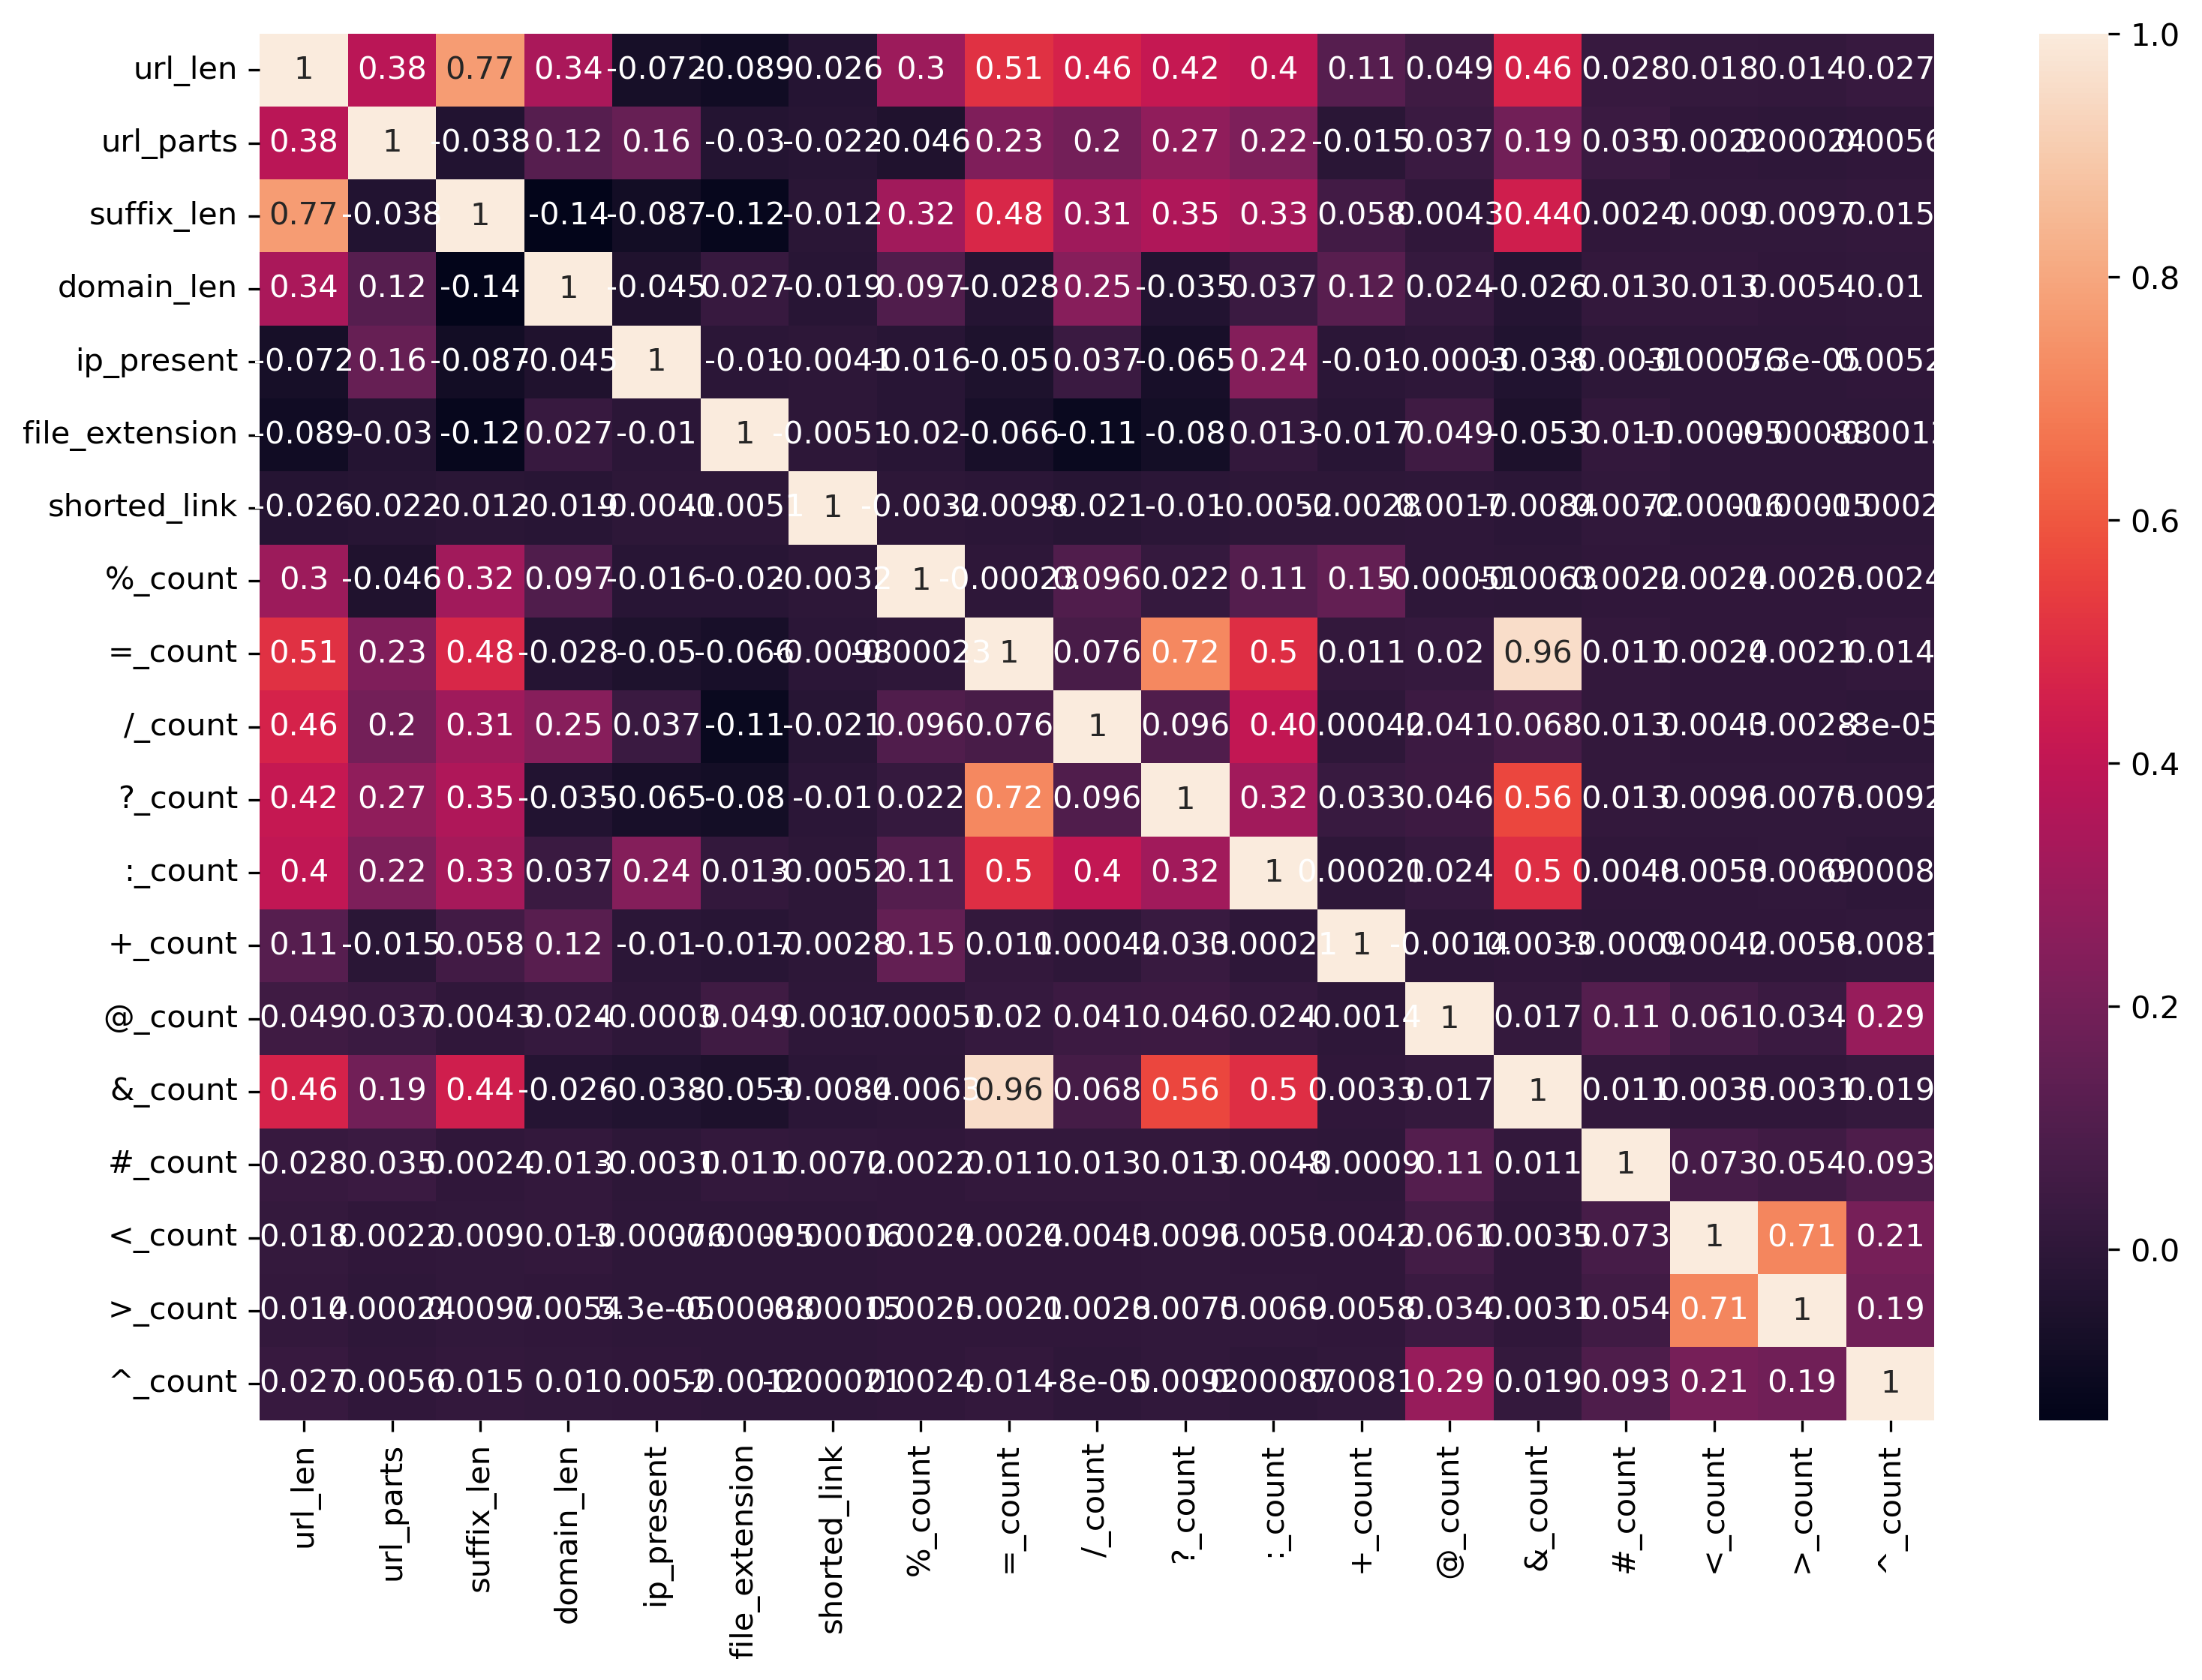

In [53]:
plt.figure(figsize=(12,8),dpi=300)
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='url_len', ylabel='%_count'>

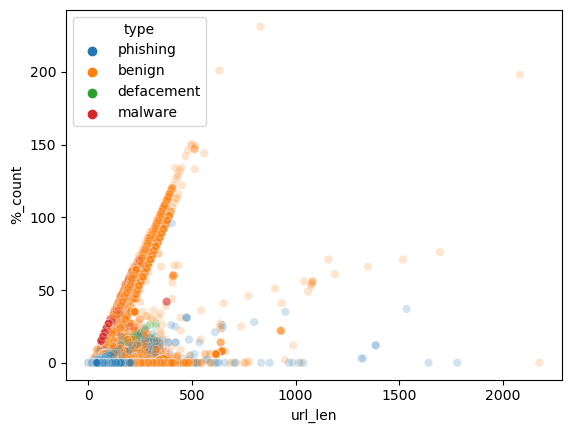

In [64]:
## Benign URLs are all over the place, hard to see malware or defacement since the dataset is so imbalanced, 
## but from what I can see they are tightly clustered however 
sns.scatterplot(x="url_len",y="%_count",hue="type",data=df, alpha=.2)

<AxesSubplot:xlabel='type', ylabel='url_len'>

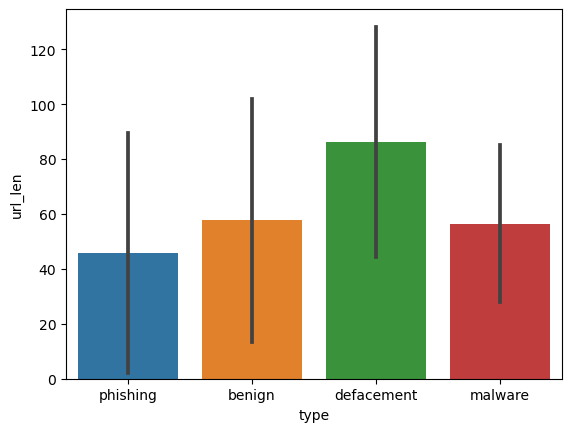

In [55]:
##Defacement has longest URLs
sns.barplot(x="type",y="url_len",data=df,ci="sd")

In [59]:
df.groupby("type").sum()

,url_len,url_parts,suffix_len,domain_len,ip_present,file_extension,shorted_link,%_count,=_count,/_count,?_count,:_count,+_count,@_count,&_count,#_count,<_count,>_count,^_count
type,,,,,,,,,,,,,,,,,,,
benign,24691024,1257947,12201203,7641141,171,942,437,230329,138133,1171016,77393,40360,42677,675,63211,149,9,14,35
defacement,8328039,370870,4339376,1657839,0,15,1,3978,224249,369052,54990,119542,706,2,166888,1,2,2,0
malware,1838777,124033,674349,566678,11788,6550,0,98481,13395,130611,4154,36383,738,42,9271,1,0,1,0
phishing,4315747,328000,1491898,1396013,409,11609,130,5507,17453,250507,9188,26754,441,726,8406,416,40,32,49


<AxesSubplot:xlabel='url_parts', ylabel='suffix_len'>

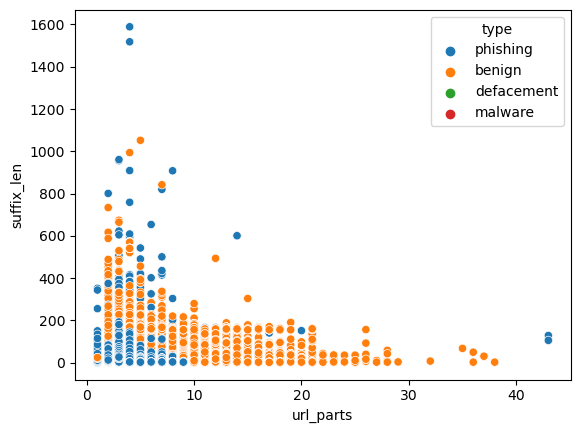

In [61]:
sns.scatterplot(x='url_parts',y='suffix_len',data=df,hue='type')

## Train | Test Split

- Split Data using Scikit-Learn's Train Test Split Method

- Scaled Data Using Standard Scaler

In [85]:
##IMPORT sklearn libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
## create X and y variables and drop type and url column and create y column of type column

X = df.drop(["type","url"],axis=1)
y = df["type"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
scaler = StandardScaler()

In [90]:
##Scale X data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model Development and Training

- Used Decision Tree, Logistic Regression, RandomForest, and K Nearest Neighbor algorithms and was able to get above 90% accuracy on 2 models

- Created a function that takes in multiple models and returns metrics

In [94]:
##Import Classification Algorithms that I will be using
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [96]:
## Create Models, with Default Parameters, will adjust using a Grid if results aren't what is expected
models = [DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier()]

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def run_classification_models(models, X_train, y_train, X_test, y_test):
    """
    Fits multiple classification models on the training data and returns their performance metrics on the test data.
    
    :param models: List of Scikit-learn classification models.
    :param X_train: Training feature data.
    :param y_train: Training target data.
    :param X_test: Test feature data.
    :param y_test: Test target data.
    
    :return: Dictionary containing the model names and their performance metrics on the test data.
    """
    
    results = {}
    
    for model in models:
        model_name = type(model).__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        
        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1-score': f1
        }
    
    return results


In [97]:
##run the function above
results = run_classification_models(models, X_train, y_train, X_test, y_test)

C:\Users\damia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\damia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

In [114]:
##After training the models, print the results Based on the results the RandomForestClassifier will likely be the best model for 
## For this dataset

for key,value in results.items():
    print(f"{key}\n--------------------------------------\nAccuracy: {round(value['accuracy'],3) * 100}")
    print(f"Precision: {round(value['precision'],3) * 100}%")
    print(f"Recall: {value['recall']}")
    print(f"F1-Score: {value['f1-score']}\n")

    

DecisionTreeClassifier
--------------------------------------
Accuracy: 0.938825131297413
Precision: 92.0%
Recall: 0.9125690847196026
F1-Score: 0.9149832487595825

LogisticRegression
--------------------------------------
Accuracy: 0.7797428311100646
Precision: 62.0%
Recall: 0.5669980814469366
F1-Score: 0.5817747084995193

RandomForestClassifier
--------------------------------------
Accuracy: 0.9448806805966482
Precision: 93.0%
Recall: 0.9198647954951833
F1-Score: 0.924101879465351

KNeighborsClassifier
--------------------------------------
Accuracy: 0.9175411296184441
Precision: 89.0%
Recall: 0.8767441582999425
F1-Score: 0.8845094872157107

